<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Actividad8/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 8***
"Solución de Ecuaciones Diferenciales Ordinarias con Python" 

---

En esta la actividad 8 de Fisica Computacional, iniciaremos esta semana explorando los métodos para resolver numéricamente problemas de valor inicial de  ecuaciones diferenciales ordinarias. 

Veremos dos métodos de solución numérica de ecuaciones diferenciales ordinarias: el método de Euler de un paso hacia enfrente y el método de multipasos de Runge-Kutta. Ambos métodos son métodos explícitos, dado que podemos conocer la solución hacia el futuro, conociendo un valor inicial.

 

También haremos uso de funciones que ofrece SciPy para integrar ecuaciones diferenciales ordinarias scipy.integrate. Veremos primero la función scipy.integrate.odeint y después la función scipy.integrate.solve_ivp.

In [ ]:
#Aqui introducimos las bibliotecas a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.integrate import odeint

%matplotlib inline

In [ ]:
#Definimos el Metodo de Euler como una función
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])

In [ ]:
#Definimos el Metodo de Rugen-Kutta como una función
def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

*   # ***Ejercicio 1.*** 
Resuelva la ecuación diferencial del oscilador de Van der Pol:

\
$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$

\
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]


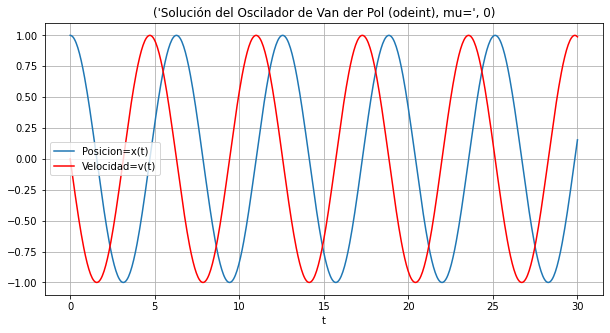

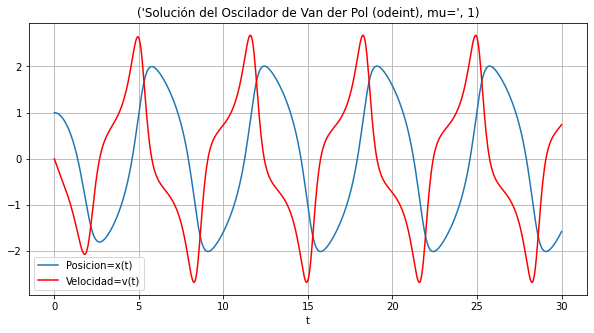

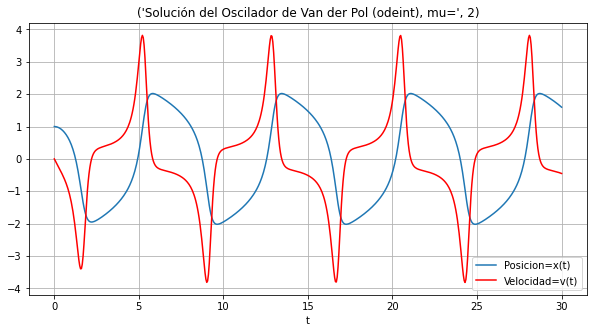

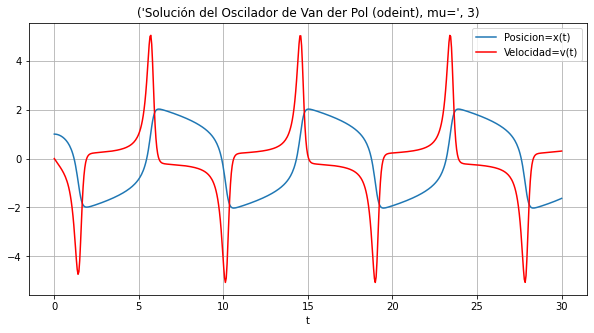

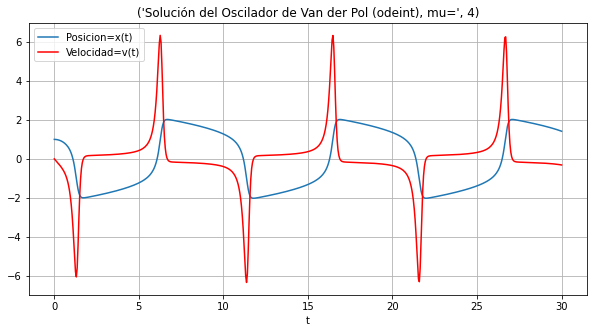

In [ ]:
#Integración utilizando 'odeint'
#Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

#Definimos las condiciones iniciales 
t_0=0.0
#y_0=[x_0, v_0] 
y_0 = [1.0, 0.0]
#Definimos el paso de integración h=(tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600
#Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts) 
# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

for mu in range(5):
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  #Definimos las dimensiones de nuestra grafica
  plt.figure(figsize=(10,5))
  #Imprimimos leyenda de ejes y titulo
  plt.plot(t, y1, label=('Posicion=x(t)'))
  plt.plot(t, y2, 'r', label=('Velocidad=v(t)'))
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol (odeint), mu=',mu))
  plt.xlabel('t')
  plt.grid()
  plt.show()

*   # ***Ejercicio 2.*** 
Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

\
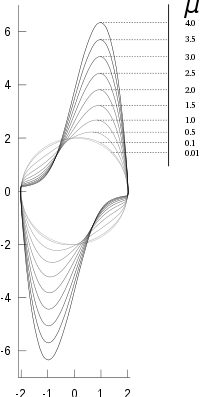

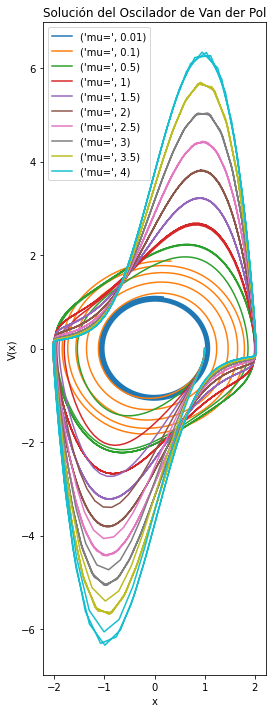

In [ ]:
#Integración utilizando 'odeint'
#Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

#Definimos las condiciones iniciales 
t_0=0.0
#y_0=[x_0, v_0] 
y_0 = [1.0, 0.0]
#Definimos el paso de integración h=(tmax-t0)/Npts
t0=0
tmax=30.0
Npts=600
#Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts) 
#Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6
#Dimensiones de la gráfica
plt.figure(figsize=(4,12))

for mu in [0.01,0.1,0.5,1,1.5,2,2.5,3,3.5,4]:
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  plt.plot(y1, y2, label=('mu=',mu))
  plt.legend(loc='best')
  #Imprimimos leyenda de titulo y ejes
  plt.title(('Solución del Oscilador de Van der Pol'))
  plt.xlabel('x')
  plt.ylabel('V(x)')
  plt.grid()
plt.show()

*   # ***Ejercicios 3.*** 
Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:

*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función scipy.integrate.odeint ó scipy.integrate-solve_ivp

*   # ***Ejercicio 3.1.*** 

$$\frac{dv}{dt}=-kv^2+g$$

Y definida de manera matricial:

 $$ \frac{d}{dt}\ \begin{pmatrix}
x\\
v
\end{pmatrix}=\begin{bmatrix} 0 &amp; 1\\ \frac{g}{x} &amp; -kv  \end{bmatrix}
\begin{pmatrix} x\\ v \end{pmatrix}=\begin{pmatrix} v \\ g-kv^2 \end{pmatrix} $$

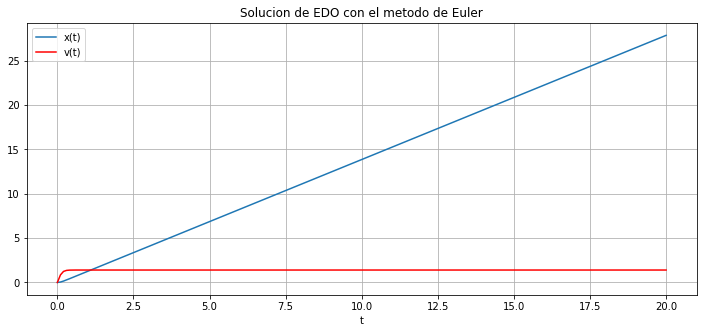

In [ ]:
#Empezaremos con el Metodo de Euler

#Definimos la función
def prim(y,t,k,g):
        x, v = y
        dydt = [v, -k*(v)**2 + g]
        return dydt
g=9.81
k=5
y=[0.0,0.0]
t = np.linspace(0, 20, 200)
#Calculamos la solución
sol = odeint(prim, y, t, args=(k,g))
#Dimensiones de la gráfica
plt.figure(figsize=(12,5))
plt.plot(t, sol[:, 0], label='x(t)')
plt.plot(t, sol[:, 1], 'r', label='v(t)')
plt.legend(loc='best')
#Imprimimos leyenda de titulo y ejes
plt.title('Solucion de EDO con el metodo de Euler')
plt.xlabel('t')
plt.grid()
plt.show()

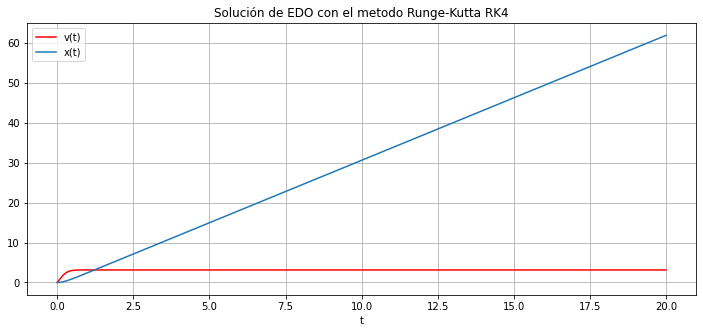

In [ ]:
#Ahora procederemos con el Metodo Runge-Kutta RK4
#Condiciones iniciales
t_0 = 0.0
x_0 = 0.0
v_0 = 0.0
v_1=0
g = 9.81
k = 1 
t = 0

#Definimos el paso de integración 
a=0.0
b=20.0
Npts=200
h=(b-a)/Npts

f = lambda t,v: -k*v_1**2 + g 

t_values = [t_0]
v_1_values = [v_0]
# Calculamos la solución con RK4
for _ in range(Npts):
  t, v_1 = runge_kutta(f, t, v_1, h)
  t_values.append(t)
  v_1_values.append(v_1)
#No se puede integrar la ecuación utilizando RK4 ya que no hay una ecuacion que dependa de x y t, por lo tanto se usara solve_ivp:
#Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
def VanderPol(t,y,k,g):
      dydt = [y[1], -k*(y[1])**2 + g]
      return dydt
y_0=[x_0,v_0]
t=np.linspace(t_0,b,Npts)
#Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6
sol = solve_ivp(lambda t, y, mu: VanderPol(t, y, k, g),(t_0,b), y0=y_0, 
                method='RK45', t_eval=t, args=(mu,), rtol=relerr, atol=abserr)
# Dimensiones de la gráfica
plt.figure(figsize=(12,5))
plt.plot(t_values, v_1_values, 'r', label='v(t)')
plt.plot(t,sol.y[0],label='x(t)')
plt.legend(loc='best')
#Imprimimos la leyenda del titulo y los ejes
plt.title('Solución de EDO con el metodo Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()

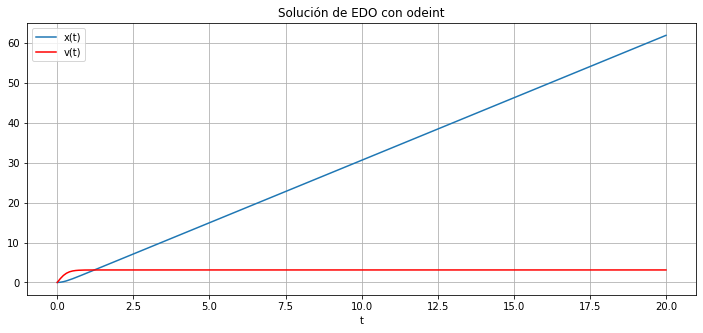

In [ ]:
#Finalmente, usaremos odeint
#Para este caso, ya tenemos definido el tiempo inicial y el paso mediante, ademas de t

#Condiciones iniciales
k = 1 

sol=odeint(prim,y_0,t,args=(k,g),atol=abserr,rtol=relerr)

#Dimensiones de la gráfica
plt.figure(figsize=(12,5))
plt.plot(t, sol[:,0], label='x(t)')
plt.plot(t, sol[:,1], 'r', label='v(t)')
plt.legend(loc='best')
#Imprimimos la leyenda del titulo y los ejes
plt.title('Solución de EDO con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

*   # ***Ejercicio 3.2.*** 

$$\frac{dy_1}{dx}=-\frac{2}{x}y_1-y^5$$

Y definida de manera vectorial:

$$ \frac{d}{dx}\begin{pmatrix} x\\y_1 \end{pmatrix}=\begin{pmatrix} y_1\\ -\frac{2}{x}y_1-y^5 \end{pmatrix} $$

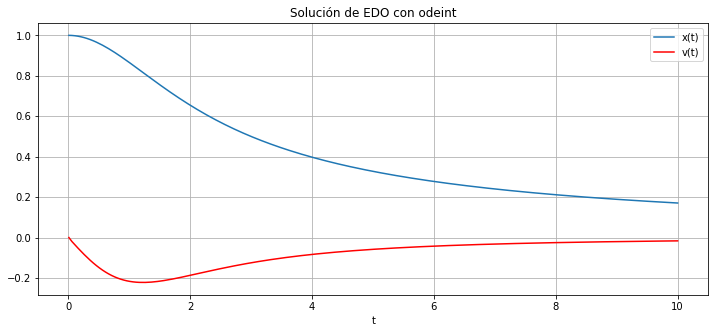

In [ ]:
#Para este caso no podremos usar ni el método de Euler ni el método de Runge-Kutta porque las ecuaciones de primer orden no dependen unicamente de 2 variables.
#Por lo tanto, se utilizara la funcion odeint
def segu(y,x):
  y , v = y
  dydx = [v, (-2/x)*v-y**5]
  return dydx
#Condiciones iniciales
#El valor x_0 debe ser diferente de cero ya que divimos entre el
x_0=0.1 
y_0=1.0
v_0=0.0

y_0=[y_0,v_0]
x=np.linspace(0.01,10.00,200)

sol=odeint(segu, y_0, x, atol=abserr, rtol=relerr)
#Dimensiones de la gráfica
plt.figure(figsize=(12,5))
plt.plot(x, sol[:,0], label='x(t)')
plt.plot(x, sol[:,1], 'r',  label='v(t)')
plt.legend(loc='best')
#Imprimimos la leyenda del titulo y los ejes
plt.title('Solución de EDO con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

*   # ***Ejercicio 3.3.*** 

$$\frac{da}{dx}=(x-1)^2+y^2+v-2$$

Y definida de manera vectorial:

$$ \frac{d}{dx}\begin{pmatrix} y\\v\\a \end{pmatrix}=\begin{pmatrix} v\\a\\(x-1)^2 +y^2+v-2 \end{pmatrix} $$

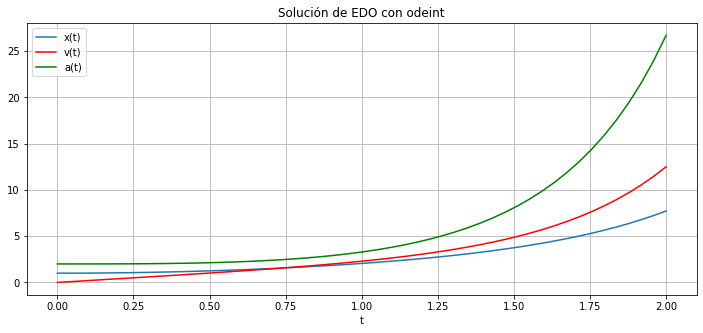

In [ ]:
#Para este caso no podremos usar ni el método de Euler ni el método de Runge-Kutta porque las ecuaciones de primer orden no dependen unicamente de 2 variables.
#Por lo tanto, se utilizara la funcion odeint

def terc(y, x):
        y, v, a = y
        dydx = [v, a, (x - 1)**2 + y**2 + v - 2]
        return dydx
# Condiciones iniciales
x_0 = 0.0
y_0 = 1.0
v_0 = 0.0
a_0 = 2.0
x = np.linspace(0.0, 2.0, 50)
a = [y_0, v_0, a_0]
 
sol=odeint(terc, a, x, atol=abserr, rtol=relerr)
#Dimensiones de la gráfica
plt.figure(figsize=(12,5))
plt.plot(x, sol[:,0], label='x(t)')
plt.plot(x, sol[:,1], 'r',  label='v(t)')
plt.plot(x, sol[:,2], 'g', label='a(t)')
plt.legend(loc='best')
#Imprimimos la leyenda del titulo y los ejes
plt.title('Solución de EDO con odeint')
plt.xlabel('t')
plt.grid()
plt.show()